In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

race_id = 5392
driver_index = 4
lap_time_cutoff = 17.5

In [3]:
# Find race_id based on track and race names

url = 'https://cf.nascar.com/cacher/2024/race_list_basic.json'
json = requests.get(url).json()
race = pd.json_normalize(json['series_1'])
race = race[['race_id', 'track_name', 'race_name']].set_index('race_id')
race = race.loc[race_id]
location = race.values[0]
name = race.values[1]
race = name + ' @ ' + location

#print(race)

print(race)

Food City 500 @ Bristol Motor Speedway


In [4]:
# Find driver info by index number (ex: Suarez is 17)
url = 'https://cf.nascar.com/cacher/2024/1/5392/lap-times.json'
json = requests.get(url).json()
driver = pd.json_normalize(json['laps'])

print(driver[['Number','FullName','Manufacturer','NASCARDriverID']])

   Number              FullName Manufacturer  NASCARDriverID
0      11          Denny Hamlin          Tyt            1361
1      19      Martin Truex Jr.          Tyt            3368
2       6       Brad Keselowski          Frd            1816
3      48           Alex Bowman          Chv            4045
4       5           Kyle Larson          Chv            4030
5      42  John Hunter Nemechek          Tyt            4092
6      17        Chris Buescher          Frd            3989
7       9         Chase Elliott          Chv            4062
8      54              Ty Gibbs          Tyt            4368
9      20      Christopher Bell          Tyt            4153
10     34      Michael McDowell          Frd            3832
11      4          Josh Berry #          Frd            4123
12     14         Chase Briscoe          Frd            4228
13     41           Ryan Preece          Frd            4070
14      1         Ross Chastain          Chv            4001
15     12           Ryan

In [5]:
# Find driver name by index
# race is Bristol Food City 500


url = f'https://cf.nascar.com/cacher/2024/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver = pd.json_normalize(json['laps'][driver_index])
driver = driver['FullName'].iloc[0]


print(driver)
print(race)


Kyle Larson
Food City 500 @ Bristol Motor Speedway


In [6]:
# driver laps

df = pd.json_normalize(json['laps'][driver_index]['Laps']).drop(0)

print('\n', driver, '\n')
print('\nTotal Average Lap Time: ', df['LapTime'].mean())
print('Total Average Lap Speed: ', df['LapSpeed'].astype(float).mean(), '\n')
print(df)


 Kyle Larson 


Total Average Lap Time:  24.110534
Total Average Lap Speed:  97.590612 

     Lap  LapTime LapSpeed  RunningPos
1      1   16.499  116.298           8
2      2   15.841  121.129           9
3      3   16.040  119.626           9
4      4   16.297  117.739          11
5      5   16.368  117.229          11
6      6   16.150  118.811          11
7      7   16.113  119.084          10
8      8   16.521  116.143          10
9      9   16.449  116.651          10
10    10   16.544  115.982           9
11    11   16.467  116.524           9
12    12   16.614  115.493           9
13    13   16.644  115.285           9
14    14   16.600  115.590           9
15    15   16.581  115.723           9
16    16   16.478  116.446           9
17    17   16.784  114.323           9
18    18   16.702  114.884           9
19    19   16.605  115.556           9
20    20   16.596  115.618           9
21    21   16.772  114.405           9
22    22   16.874  113.713           8
23    23   23

In [7]:
# non-green lap times throw off average, check for slow lap times

print(df.head(), '\n')
print(df['LapTime'] > lap_time_cutoff)

   Lap  LapTime LapSpeed  RunningPos
1    1   16.499  116.298           8
2    2   15.841  121.129           9
3    3   16.040  119.626           9
4    4   16.297  117.739          11
5    5   16.368  117.229          11 

1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     Fa

In [8]:
# take out yellow flag laps by lap_time_cutoff
# post fixed averages

race_laps = df[df['LapTime'] < lap_time_cutoff]

print('\n', driver, '\n')
print('Min Lap: ', race_laps['LapTime'].min())
print('Ave Lap: ', race_laps['LapTime'].astype(float).mean())
print('Max Lap: ', race_laps['LapTime'].max(), '\n')
print('Averages:\n', race_laps[['LapTime','LapSpeed','RunningPos']].astype(float).mean())


 Kyle Larson 

Min Lap:  15.841
Ave Lap:  16.86696438356164
Max Lap:  17.498 

Averages:
 LapTime        16.866964
LapSpeed      113.796734
RunningPos      8.421918
dtype: float64


In [9]:
# present cleaned data

print(race_laps)

     Lap  LapTime LapSpeed  RunningPos
1      1   16.499  116.298           8
2      2   15.841  121.129           9
3      3   16.040  119.626           9
4      4   16.297  117.739          11
5      5   16.368  117.229          11
6      6   16.150  118.811          11
7      7   16.113  119.084          10
8      8   16.521  116.143          10
9      9   16.449  116.651          10
10    10   16.544  115.982           9
11    11   16.467  116.524           9
12    12   16.614  115.493           9
13    13   16.644  115.285           9
14    14   16.600  115.590           9
15    15   16.581  115.723           9
16    16   16.478  116.446           9
17    17   16.784  114.323           9
18    18   16.702  114.884           9
19    19   16.605  115.556           9
20    20   16.596  115.618           9
21    21   16.772  114.405           9
22    22   16.874  113.713           8
39    39   17.262  111.157          13
40    40   16.027  119.723          12
41    41   16.475  116.46

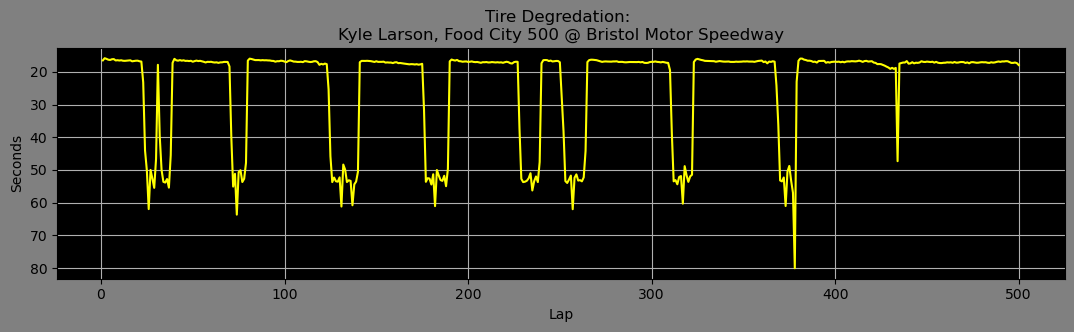

In [10]:
# tire degredation with all laps

laptime = df['LapTime']
lap = df['Lap']
title = 'Tire Degredation: \n' + driver + ', ' + race

fig, ax = plt.subplots(figsize=(13,3))
ax.plot(lap, laptime, color='yellow')
ax.invert_yaxis()
ax.set_xlabel('Lap')
ax.set_ylabel('Seconds')
ax.set_title(title)
ax.set_facecolor('black')
fig.set_facecolor('grey')
ax.grid()
plt.show()

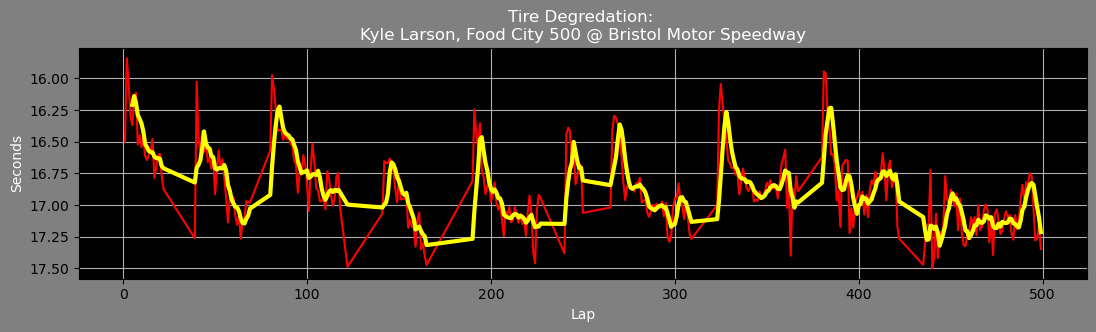

In [30]:
# plot tire degredation w/cleaned data
# set laptime, lap for y, x
laptime = race_laps['LapTime']
lap = race_laps['Lap']


#create simple moving average
moving_average = laptime.rolling(5).mean()

fig, ax = plt.subplots(figsize=(13,3))
ax.plot(lap, laptime, color='red') 
ax.plot(lap, moving_average, color='yellow', linewidth=3)
ax.invert_yaxis()
ax.set_xlabel('Lap', color='white')
ax.set_ylabel('Seconds', color='white')
ax.set_title(title, color='white')
ax.set_facecolor('black')
fig.set_facecolor('grey')
ax.grid()
plt.savefig('Tire_Degredation.png', bbox_inches = 'tight')
plt.show()

In [12]:
print('Min Lap: ', race_laps['LapTime'].min())
print('Max Lap: ', race_laps['LapTime'].max(), '\n')


start_pos = df['RunningPos'].head(1)
start_pos = start_pos[1]
end_pos = df['RunningPos'].tail(1).to_numpy()
end_pos = end_pos[0]

print(f'Started: P-{start_pos} \nEnded: P-{end_pos}')

Min Lap:  15.841
Max Lap:  17.498 

Started: P-8 
Ended: P-5
